## Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Accessing the dataset

In [3]:
# Accessing the data

wine = pd.read_csv('Wine.csv')
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Splitting the dataset into target and feature values

In [5]:
# Defining the target

y = wine['Wine']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [6]:
# Defining the feature set

X = wine.drop(['Wine'], axis = 1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# Checking the dimensions of the target and the feature set

X.shape, y.shape

((178, 13), (178,))

### Standardization of the features

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# Checking the dimension of standardized feature set

X_sc.shape

(178, 13)

### Building the LDA model

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis(n_components = 2)
lda

# n_components <= min(n_classes - 1, n_features)
# n_components <= min(3 - 1, 13)
# n_components <= min(2, 13)
# Hence we take the n_components to be 2, which is the dimension of the hyper plane on to which we want to project.

LinearDiscriminantAnalysis(n_components=2)

### Transformation of the data

In [13]:
X_lda = lda.fit_transform(X_sc, y)
X_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

In [14]:
# Checking the dimension of X_lda

X_lda.shape

(178, 2)

### Visualization of the transformed data to view the class separation / discriminants

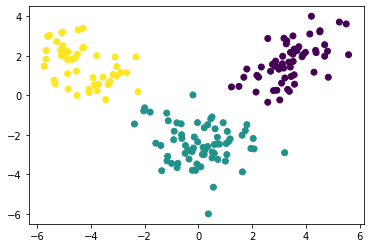

In [18]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = y);

# Colour is provided with respect to the target value (3 classes and hence 3 colors).
# Subsequently, there is no mixing of colours and hence the class separation as that of the original dataset is preserved.
# Class separation can be also termed as dicriminants.
# LDA requires labeled data for class separation while PCA can be applied for both labeled and unlabeled data.
# Compared to PCA, LDA gives us better results.

# *****Common similarities: -*****  
# Dimensionality reduction techniques, 
# Eigen values 
# Eigen vectors 
# Covariance matrix 
# Projection methods

# *****Disimilarities: -***** 
# PCA is used for unlabeled data while LDA is used for labeled data.
# LDA is used for class distinction while PCA is used to ensure minimum loss of data.

## Locally Linear Embedding

**This focuses on manifold learning. It is not the same as PCA or LDA. In this technique, for each data point, k neighbours are identified. These points are represented as linear combination of its neighbours using initial random weights, represented as W.**

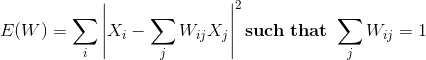

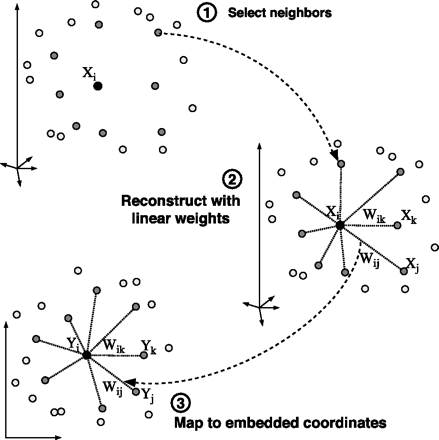

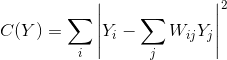

LLE first finds the k-nearest neighbors of the points. Then, it approximates each data vector as a weighted linear combination of its k-nearest neighbors. Finally, it computes the weights that best reconstruct the vectors from its neighbors, then produce the low-dimensional vectors best reconstructed by these weights [6].

1. Finding the K nearest neighbours.
One advantage of the LLE algorithm is that there is only one parameter to tune, which is the value of K, or the number of nearest neighbours to consider as part of a cluster. If K is chosen to be too small or too large, it will not be able to accomodate the geometry of the original data.
Here, for each data point that we have we compute the K nearest neighbours.

2. We do a weighted aggregation of the neighbours of each point to construct a new point. We try to minimize the cost function, where j’th nearest neighbour for point Xi

3. Now we define the new vector space Y such that we minimize the cost for Y as the new points.

In [19]:
from sklearn.datasets import make_swiss_roll

In [20]:
X_swr, y_swr = make_swiss_roll(n_samples = 1000, random_state = 100)

In [21]:
X_swr

array([[-9.02243256,  0.58237783, -3.91158679],
       [ 3.63249892,  8.02698255,  6.37347947],
       [-6.59990375, 20.01826915,  5.68894892],
       ...,
       [ 6.06643253, 20.59885419, -0.90994904],
       [ 1.72607563,  7.66075992, -4.75699209],
       [-6.24197451, 16.34985863, -8.25349579]])

In [23]:
X_swr.shape

(1000, 3)

In [22]:
y_swr

array([ 9.8338599 ,  7.33595863,  8.71337301, 12.67421645,  4.75686315,
        5.85815095, 11.03405017, 12.49586783,  6.00081823, 10.13251592,
       13.11290049,  6.68407253,  6.4590663 ,  5.73381711,  6.78298907,
       13.93570086, 12.36232244,  6.33289485, 12.405126  ,  7.29547319,
        8.78110506, 13.57196131, 12.41855283,  7.88016948,  6.36559356,
        8.22624823,  4.7660019 ,  7.09145131, 12.21133145,  4.8561637 ,
       10.35635484, 10.40311269,  5.70338257,  8.31212114,  5.05616771,
       13.10432026, 13.95735025,  5.27732892, 13.10558677, 10.14955752,
       11.71009519, 10.65173266, 10.19612245,  4.90502326,  6.69184284,
        9.84592302, 11.96112869,  7.07513585,  7.40689238, 12.74602342,
       13.90160869, 13.0519348 ,  8.10067058, 10.35650158,  8.05625884,
        7.91860622,  6.39076277,  6.95260412,  5.13520603,  9.47596798,
        8.25848482, 10.29944826, 10.64945129,  6.05636528, 13.51363588,
       13.63180922, 10.38890125,  8.36700007,  8.13535528,  6.63

In [24]:
y_swr.shape

(1000,)

### Plotting the swiss roll dataset

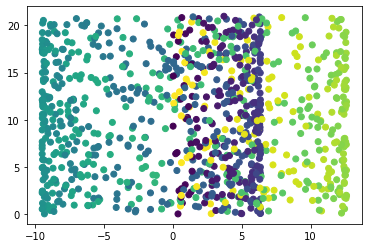

In [27]:
plt.scatter(X_swr[:, 0], X_swr[:, 1], c = y_swr);

### Building the LLE model

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

In [35]:
lle = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2)

In [36]:
lle

LocallyLinearEmbedding(n_neighbors=10)

### Transforming the data

In [37]:
X_lle = lle.fit_transform(X_swr)
X_lle

array([[-0.00034981, -0.05148897],
       [ 0.02608563, -0.01026775],
       [ 0.01085645,  0.00058008],
       ...,
       [ 0.03429473,  0.06336601],
       [ 0.04373707,  0.03406464],
       [-0.0076968 , -0.01825138]])

### Visualization of the transformed data

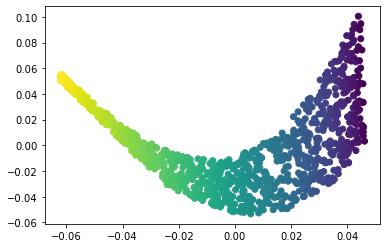

In [38]:
plt.scatter(X_lle[:, 0], X_lle[:, 1], c = y_swr);

#### Locally Linear Embedding with the Wine Dataset

In [39]:
X_lle_sc = lle.fit_transform(X_sc)
X_lle_sc

array([[-8.62269256e-02,  3.06191317e-02],
       [ 7.94151037e-02,  8.60817924e-02],
       [-7.39499216e-02,  2.79678400e-02],
       [-1.15712867e-01, -6.81888185e-03],
       [-4.76125354e-02,  7.99524114e-02],
       [-1.09891974e-01,  8.20051475e-03],
       [-4.47393649e-02,  1.01759945e-02],
       [-5.68485641e-02,  3.73993773e-02],
       [-6.00811660e-02,  1.47624335e-02],
       [-7.11712917e-02,  6.50420742e-03],
       [-9.78293902e-02, -5.46433802e-03],
       [-2.76914488e-02,  1.72636626e-02],
       [-4.73051390e-02,  4.33817810e-03],
       [ 5.63018762e-02,  1.58038294e-01],
       [-1.76909659e-02,  1.02319568e-01],
       [-1.02733932e-01,  1.60075011e-02],
       [-8.71970616e-02,  4.34247599e-02],
       [-7.73339955e-02,  5.16225133e-02],
       [-1.22280005e-01,  1.61171954e-03],
       [-8.62437768e-02, -9.06344800e-03],
       [-8.61528202e-02,  2.47991839e-02],
       [-8.45278476e-02, -8.05684629e-03],
       [-6.33391707e-02,  1.14401653e-02],
       [-5.

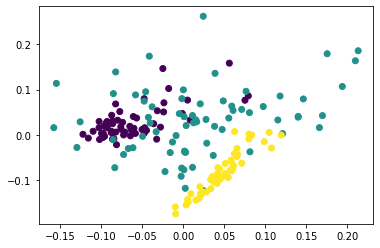

In [40]:
plt.scatter(X_lle_sc[:, 0], X_lle_sc[:, 1], c = y);